### 1. 영상 읽기

In [ ]:
#!pip install opencv-python
#!pip install matplotlib
#!pip install numpy

In [2]:
#!pip install opencv-python
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

print(cv2.__version__)

4.11.0


In [ ]:
# cv2.imread(filename. flags = None) -> retval
# flags:
# cv2.IMREAD_COLOR: BGR color로 읽기
# cv2.IMREAD_GRAYSCALE: 그레이 color로 읽기
# cv2.IMREAD_UNCHANGED: 파일 속성대로 읽기
# cv2.IMREAD_REDUCED_GRAYSCALE_2 
# cv2.IMREAD_REDUCED_COLOR_2 

# retval: numpy.ndarray로 반환

In [ ]:
img  = cv2.imread("./fig/mri_brain.jpeg", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Image read failed")
    sys.exit()

print(type(img)) # class numpy
print(img.shape) # bgr (rgb x)
print(img.dtype)

# # cv2_imshow(img)
cv2.imshow("dog", img)

cv2.waitKey(0) # ms
cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(630, 630)
uint8


2025-03-19 20:13:29.157 python[90063:6775221] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-19 20:13:29.157 python[90063:6775221] +[IMKInputSession subclass]: chose IMKInputSession_Modern


### 새창띄우기 : cv2.namedWindow()

In [ ]:
# cv2.namedWindow(winname, flags = None) -> None

# winname: 창 이름
# flags:
# cv2.WINDOW_NORMAL: 영상크기를 창 크기에 맞게 지정
# cv2.WINDOW_AUTOSIZE: 창크기를 영상 크기에 맞게 변경

# cv2.imwrite(filename, mat) -> None
# filename: 저장할 이름
# mat: numpy.ndarray (default = uint8)

# uint16, int32의 경우 255로 나누어서 출력
# float32, float64의 경우 0 ~ 1로 만든 후 행렬값에 255를 곱해서 출력

In [33]:
## cv2.namedWindow()
img = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR)

print("width = {}, height = {}".format(
    img.shape[1], img.shape[0]))

# img_resize = cv2.resize(img, (img.shape[1]//2, img.shape[0]//2))

if img is None:
    print("Image read failed")
    sys.exit()

## cv2.WINDOW_AUTOSIZE: 창의 크기를 영상에 맞춤
# cv2.namedWindow("Dog", cv2.WINDOW_AUTOSIZE)

cv2.namedWindow("Dog", cv2.WINDOW_NORMAL)
cv2.imshow("Dog", img)
# cv2.imshow("Dog_resize", img_resize)

cv2.waitKey(0)
cv2.destroyAllWindows()
# cv2.waitKey(1) # mac

width = 640, height = 480


### 2. 키보드 입력대기

In [ ]:

# waitKey([, delay]) -> retval
# delay: Delay in milliseconds. 0 is the special value that means "forever"
# cv2.waitKey() -> ASCII code
# retval

In [62]:
img  = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR)

if img is None:
    print("Image read failed")
    sys.exit()

cv2.namedWindow("dog", cv2.WINDOW_NORMAL)
cv2.imshow("dog", img)

while True:
    if cv2.waitKey() == ord("q"):
        break
    
# cv2.waitKey()
cv2.destroyAllWindows()

## matplotlib

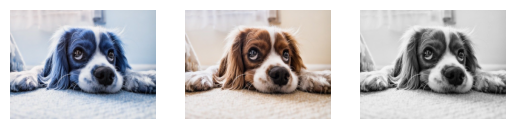

In [ ]:
import matplotlib.pyplot as plt

img  = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR) # BGR
imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #RGB
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # GRAY

if img is None:
    print("Image read failed")
    sys.exit()

# cv2.namedWindow("dog", cv2.WINDOW_AUTOSIZE)
# cv2.imshow("dog", img)

# plt.imshow(imgrgb)
# plt.axis("off")
# plt.show()

plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(img), plt.axis("off")
plt.subplot(132), plt.imshow(imgrgb), plt.axis("off")
plt.subplot(133), plt.imshow(imggray, cmap = "gray"), plt.axis("off")
plt.show()

# while True:
#     if cv2.waitKey() == 27:
#         break

# cv2.destroyAllWindows()

### 3. 온라인 영상 읽기

In [ ]:
# bytearray도 1바이트 단위의 값을 연속적으로 저장하는 시퀀스 자료형인데, bytes와 차이점은 요소를 변경할 수 있느냐의 차이
# 0~255(0x00~0xFF)까지 정수
bytes(10)
bytes([10, 20, 30, 40, 50])
bytes(b'hello')

b'hello'

In [23]:
from urllib import request

# url = "https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/220px-Lenna.png"
url = "https://image.artbox.co.kr/upload/C00001/goods/800_800/179/241101006087179.jpg?s=/goods/org/179/241101006087179.jpg"

source = request.urlopen(url).read() # bytes
print(type(source))

<class 'bytes'>


In [25]:
image = np.array(bytearray(source), dtype = np.uint8)
print("image shape = ", image.shape) # (101968,)

image = cv2.imdecode(image, cv2.IMREAD_COLOR)
cv2.imwrite("Charistmas_download.png", image)

cv2.namedWindow("img", cv2.WINDOW_NORMAL)
cv2.imshow("img", image)

cv2.waitKey()
cv2.destroyAllWindows()


image shape =  (161202,)


### 4. 디렉토리 내 영상읽기

In [2]:
# import glob
# img_files = glob.glob('./fig/images/*.jpg')

import os
img_list = os.listdir('./fig/images')
# print(img_list)

img_files = [] # list
for i in img_list:
    img_dir = './fig/images/' + i # python string
    img_files.append(img_dir)


# print(img_files)

cv2.namedWindow("folder images", cv2.WINDOW_NORMAL)
cv2.setWindowProperty("folder images", cv2.WND_PROP_FULLSCREEN,
                      cv2.WINDOW_FULLSCREEN)

idx = 0
while True:
# for i in img_files:

    img = cv2.imread(img_files[idx], cv2.IMREAD_COLOR)
    cv2.imshow('folder images', img)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

### 5. 영상의 픽셀값 참조

In [3]:

img  = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

print("img width = {}, height = {}".format(
    img.shape[1], img.shape[0]))

## 영상 픽셀값
x = 320; y = 240
print("x = {}, y = {} 의 픽셀값".format(x, y))
print(img[240, 320])
# print(img[200:300, 250:400])
img[150:250, 250:500] = (125,  44,  66)

cv2.namedWindow("image", cv2.WINDOW_AUTOSIZE)

cv2.imshow("image", img)

while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

img width = 640, height = 480
x = 320, y = 240 의 픽셀값
[ 0 14 40]


### 6. Canvas

In [48]:
# img1 = np.random.randint(0, 255, (200, 200), np.uint8) # int32
img2 = np.ones((1200, 800, 3), dtype = np.uint8)*255
# img3 = np.zeros((200, 200), np.uint8) + 255
# img4 = np.full((200, 200, 3), (255, 0, 255), np.uint8)

# cv2.imshow("rand int", img1)
cv2.imshow("rand ones", img2)
# cv2.imshow("rand zeros", img3)
# cv2.imshow("rand full", img4)


cv2.waitKey()
cv2.destroyAllWindows()

### 7. 영상 복사 (memory copy)

In [4]:
img = cv2.imread("./fig/rose.jpg", cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

# img2 = img
# deep copy
img2 = img.copy()

img2[100:150, 200:300] = (255, 0, 0)

cv2.namedWindow("rose", cv2.WINDOW_AUTOSIZE)
cv2.imshow("rose", img)
cv2.imshow("rose copy", img2)


while True:
    if cv2.waitKey() == ord("q"):
        break

cv2.destroyAllWindows()

### 8. 영상합성

In [ ]:
# 마스크 영상을 이용한 영상 합성 
# cv2.copyTo(src, mask, dst = None) -> dst
# src: copy 하고자 하는 원본 영상
# mask: mask 영상
# dst: copy 후에 결과 영상

In [8]:
## 부분영상: 영상 합성에 유리

img = cv2.imread("./fig/dog.bmp", cv2.IMREAD_COLOR)

if img is None:
    print("image read failed")
    sys.exit()

dog_eye = img[150:250, 250:500]

# circle(img, center, radius, color[, thickness[, lineType[, shift]]]) -> img
cv2.circle(dog_eye, (50, 50), 30, (0, 0, 255), 5)
print(dog_eye.shape)


cv2.namedWindow("dog", cv2.WINDOW_NORMAL)
cv2.imshow("dog", img)
cv2.imshow("dog eye", dog_eye)


while True:
    if cv2.waitKey() == 27:
        break

cv2.destroyAllWindows()

(100, 250, 3)


In [2]:
## copyTo(): 영상합성
src = cv2.imread("./fig/airplane.bmp", cv2.IMREAD_COLOR)
mask = cv2.imread("./fig/mask_plane.bmp", cv2.IMREAD_GRAYSCALE)
dst = cv2.imread("./fig/field.bmp", cv2.IMREAD_COLOR) #

print(dst.shape)

if src is None or mask is None or dst is None:
    print("Images read failed")
    sys.exit()

## numpy class
# dst[mask > 0] = src[mask > 0]
cv2.copyTo(src, mask, dst)

cv2.imshow("src", src)
cv2.imshow("mask",mask)
cv2.imshow("dst",dst)

cv2.waitKey()
cv2.destroyAllWindows()


(400, 600, 3)


### 9. Draw lines

In [ ]:
# cv2.line(img, pt1, pt2, color, thickness = None, lineType = None, shift = None) -> img
# flags
    # img:그림을 그릴 영상
    # pt1, pt2: 직선의 시작점, 끝점 
    # color: 직선의 칼라 (B,G,R)의 튜플
    # thinkness: 선두께, 기본은= 1
    # lineType: cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA

# cv2.rectangle(img, pt1, pt2, color, thickness = None, lineType = None) -> img
   # pt1 :좌측 상단,  pt2: 우측하단
# cv2.rectangle(img, rect, color, thickness = None, lineType = None) -> img
    # rect: 사각형의 위치 정보 (x, y, w, h)
# cv2.circle(img, center, radius, color, thickness = None, lineType = None) -> img
    # center: 원의 중심좌표 (x, y)
    # radius : 원의 반지름

# cv2.ellips(img, center, axes, angle, startAngle, endAngle, color[, thickness[, lineType[, shift]]]) -> img
    # center: 원의 중심좌표 (x, y)
    # axis: 축의 반지름(x, y)
    # angle: 타원의 기울기 (예, 10, 오른쪽으로 10도 기울어짐)
    # startAngle: 타원을 그리는 시작 각도 (3시 방향이 0도)
    # endAngle: 타원을 그리는 종료 각도

# cv2.polylines(img, pts, isClosed, color, thickness = None, lineType = None) -> img
    # center: 다각형 점들의 array
    # isClosed : True for 폐곡선

In [7]:
img = np.ones((600, 1200, 3), np.uint8)*255
pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
## 그리기

img = np.ones((600, 1200, 3), np.uint8)*255
cv2.line(img, (100, 50), (300 ,50), (0, 0, 255), 10, cv2.LINE_AA)
cv2.line(img, (300 ,50), (200, 300), (0, 0, 255), 20, cv2.LINE_AA)
cv2.arrowedLine(img, (400, 50), (400, 300), (255,  0, 0), 10, cv2.LINE_AA)

# cv2.rectangle(img, (200, 400), (400, 500), (0, 0, 255), 5, cv2.LINE_AA)
cv2.rectangle(img, (200, 400, 200, 100), (0, 0, 255), 5, cv2.LINE_AA)

cv2.circle(img, (700, 300), 100, (255, 0, 255), -1)

cv2.ellipse(img, (500, 100), (100, 50), 10, 0, 360, (255, 0, 0), 2)

pts = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])
cv2.polylines(img, [pts], True, (255, 0, 255), 2, cv2.LINE_AA)

text = "OpenCV version=4.9"
cv2.putText(img, text, (700, 100), cv2.FONT_ITALIC, 1, 
            (0, 0, 255), 2, cv2.LINE_AA)

cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()